In [12]:
import matplotlib.pyplot as plt
import ESN_np_double
import time
import numpy as np

# Parameters
Two,Ttrain = 5000,100000
N = 100
C = 0.98
dim = 5
N_d = int(N * dim)
maxtau = int(N_d * 1.2)

np.random.seed(0)
u_asym = np.random.rand(dim, Two + Ttrain)
u_sym = 2 * u_asym - 1

for i in range(dim):
    u_sym[i] = u_sym[i]*np.sqrt(i+1)
    
esn = ESN_np_double.ESN_mult(N_d, uC=C, dim=dim,idWin = True)
Xwo = esn.run_washout(u_sym, Two, actf="identity")
mfs = ESN_np_double.MCwithPI_general(u_sym, Xwo, maxtau)
totMC = np.sum(mfs)




[0.3345113  0.66664971 1.00001397 1.33399308 1.66154769]
[ 35.721295    70.7645061  104.72198418 135.61249216 168.73328979]


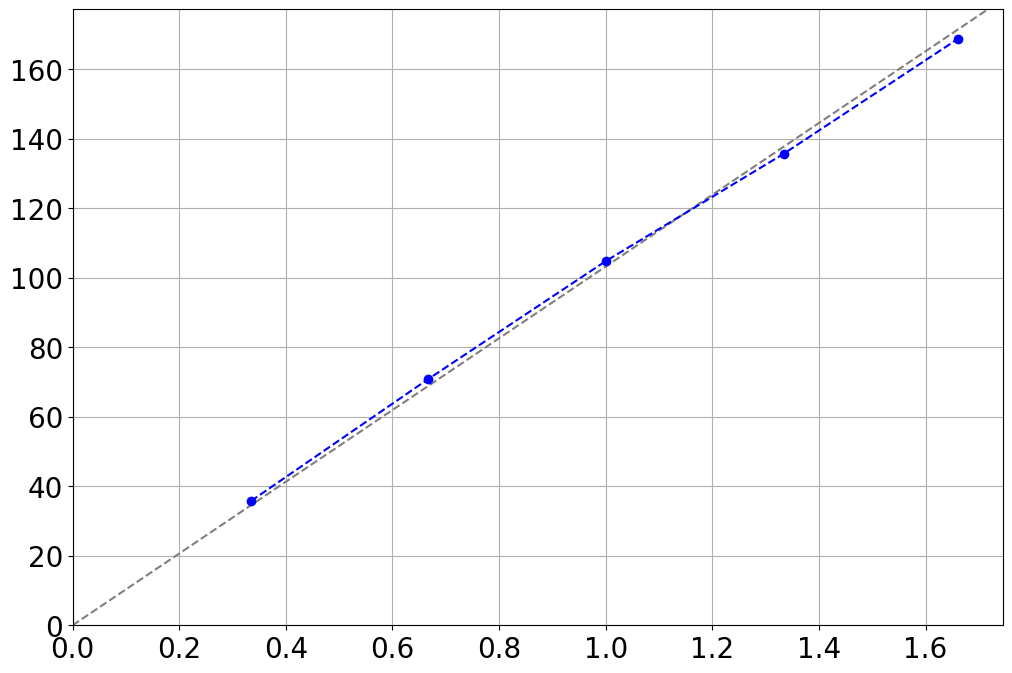

In [13]:

vars = np.var(u_sym,axis = 1)
MCs = np.sum(mfs,axis=1)
plt.rcParams.update({'font.size': 20})
fig,ax = plt.subplots(figsize=(12,8))
plt.axline((0,0),(np.sum(vars),np.sum(MCs)),c="grey",linestyle="--")
plt.plot(vars,MCs,"bo--")
plt.grid(True)
plt.xlim(0,np.max(vars)*1.05)
plt.ylim(0,np.max(MCs)*1.05)
#plt.xlabel(r"$\sigma^2 (u_{k}(t))$")
#plt.ylabel(r"$MC^(k)$")
print(vars)
print(MCs)

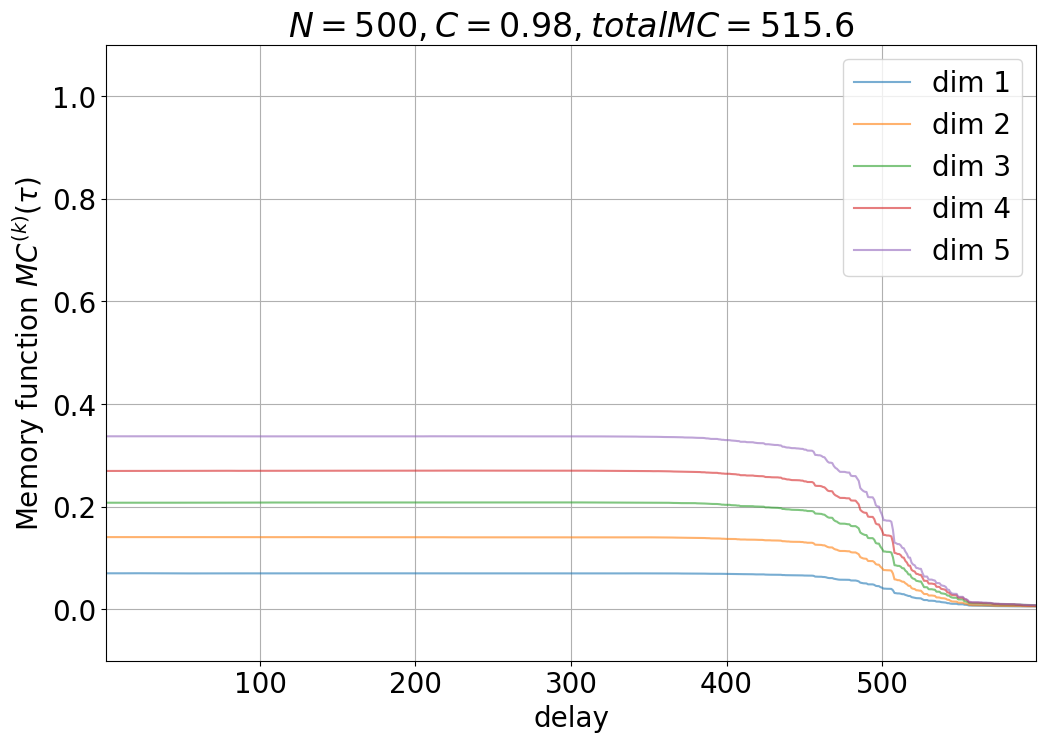

In [14]:
# plot forgetting curve
#maxtau = 1300
fig,ax = plt.subplots(figsize=(12,8))
taus = np.arange(1,maxtau)
for dim in range(dim):
    plt.plot(taus,mfs[dim][:taus.shape[0]],alpha=0.6,label="dim "+str(dim+1))
plt.xlim(1,taus.shape[0])
plt.ylim(-0.1,1.1)
#plt.ylim(0,0.05)

plt.xlabel("delay")
plt.ylabel(r'Memory function $MC^{(k)}(\tau)$')
plt.title(r'$N=%d, C=%.2f, totalMC=%.1f$'%(N_d,C,totMC))
plt.legend()
plt.grid(True)
plt.show()